# 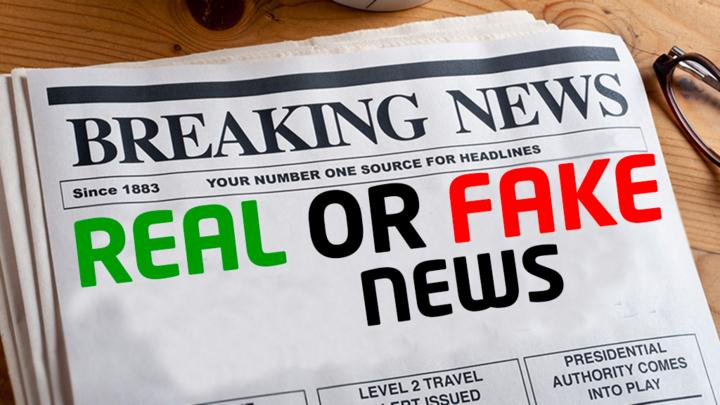



**Importing required library**

Here I am going to importing some of the required library, if extra library is required to install It will be install later on.  

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
#from sklearn import naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import classification_report
import re
import string

### Inserting dataset

In [ ]:
df = pd.read_csv('news.csv')
X=df['text']
y=df['label']

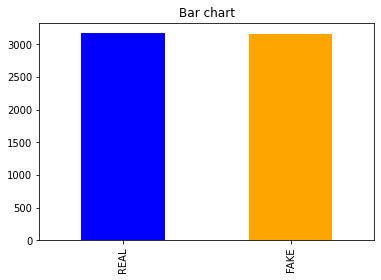

In [ ]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

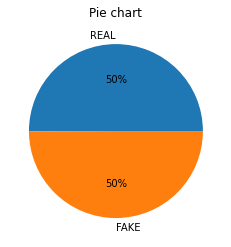

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
count1 = Counter(" ".join(df[df['label']=='REAL']["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in REAL", 1 : "count"})
count2 = Counter(" ".join(df[df['label']=='FAKE']["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in FAKE", 1 : "count_"})

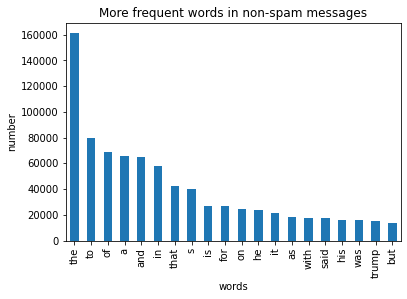

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in REAL"]))
plt.xticks(y_pos, df1["words in REAL"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

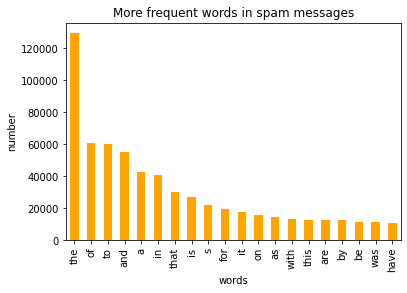

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in FAKE"]))
plt.xticks(y_pos, df2["words in FAKE"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["label"]

#### Splitting the dataset into training set and testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.913510101010101

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       798
        REAL       0.93      0.89      0.91       786

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.8055555555555556

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        FAKE       0.81      0.81      0.81       798
        REAL       0.81      0.80      0.80       786

    accuracy                           0.81      1584
   macro avg       0.81      0.81      0.81      1584
weighted avg       0.81      0.81      0.81      1584



### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.8977272727272727

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       798
        REAL       0.91      0.88      0.90       786

    accuracy                           0.90      1584
   macro avg       0.90      0.90      0.90      1584
weighted avg       0.90      0.90      0.90      1584



### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.8800505050505051

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        FAKE       0.87      0.90      0.88       798
        REAL       0.89      0.86      0.88       786

    accuracy                           0.88      1584
   macro avg       0.88      0.88      0.88      1584
weighted avg       0.88      0.88      0.88      1584



### 5. Linear Super Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVC = LinearSVC()
SVC.fit(xv_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
pred_SVC = SVC.predict(xv_test)

In [ ]:
SVC.score(xv_test, y_test)

0.9393939393939394

In [ ]:
print(classification_report(y_test, pred_SVC))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       798
        REAL       0.94      0.93      0.94       786

    accuracy                           0.94      1584
   macro avg       0.94      0.94      0.94      1584
weighted avg       0.94      0.94      0.94      1584



# Fake news Detection

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 'FAKE':
        return "Fake News"
    elif n == 'REAL':
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_SVC = SVC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVC[0])))

In [ ]:
news = str(input())
manual_testing(news)

your email was selected to claim to sum of  $ 5,000,000 in the 2011 european lottery


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
SVC Prediction: Fake News
